In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
import json
import os
import pandas as pd
import seaborn as sns
import glob
from natsort import natsorted
from scipy import stats
from sklearn.metrics import recall_score
from sklearn.metrics import auc as auc_score
from sklearn.metrics import roc_auc_score, roc_curve
sns.set(style="whitegrid")
import matplotlib as mpl

In [4]:
def histogram(data):
    amnts, bins = np.histogram(data,bins=[0, 0.5, 1])
    return amnts[-1]/(np.sum(amnts))

def hist_pred(data, thresh=0.5):
    amnts, bins = np.histogram(data,bins=[0, thresh, 1])
    return int(amnts[0] < amnts[-1])

def process_fold(fold, aggregation_function=histogram, prediction_function=hist_pred, make_auc_plot=False):
    aucs = []
    labels = []
    confs = []
    scores = []
    for patient, data in fold.items():
        pred_key = 'predictions'
        label_key = 'label'
        if pred_key not in data:
            pred_key = 'val_predictions'
            label_key = 'val_label'
        if len(data[pred_key]) > 1:
            labels.append(data[label_key])
            confs.append(aggregation_function(data[pred_key]))
            score = int(data[label_key] == prediction_function(data[pred_key]))
            scores.append(score)
        else:
            continue
    auc = roc_auc_score(labels, confs)
    if make_auc_plot:
        fpr, tpr, thresh = roc_curve(labels, confs)
        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC={auc:.4f}')
        plt.legend()
    return auc, np.mean(scores)

In [5]:
def create_mega_fold(run_ids, root_dir='/home/colin/results_cov/', control=False):
    mega_fold = {}
    if control:
        root_dir = os.path.join(root_dir, 'control')
    for run_id in run_ids:
        files = glob.glob(os.path.join(root_dir, f'*{run_id}*.json'))
        assert len(files) == 1
        file = files[0]
        with open(file) as fp:
            all_data = json.load(fp)        
            test_fold = {patient: data for patient, data in all_data.items() if 'predictions' in data}
            for patient, data in test_fold.items():
                if patient in mega_fold:
                    mega_fold[patient]['predictions'] += data['predictions']
                else:
                    mega_fold[patient] = data
    return mega_fold

In [6]:
baseline_post_runs = [
    'post/*3eksx42g',
    'post/*2l0gc8tn',
    'post/*2kdtdg4x',
    'post/*2cie7m9z'
]

In [7]:
baseline_runs = [
    '3eksx42g',
    '2l0gc8tn',
    '2kdtdg4x',
    '2cie7m9z'
]

center_mask_32_runs = [
    '34wk6ram',
    '1pwa5tf7',
    '1pe3tllc',
    '1aisnvw3'
]

center_mask_96_runs = [
    '3uwb88u4',
    '3n3zlvr9',
    '3ix0r6le',
    '3ejmx4iq'
]

outer_mask_128_runs = [
    'do7pov5c',
    '3g451sjy',
    '2eywkyio',
    '1u9aj4wa'
]

outer_mask_200_runs = [
    'x397waoz',
    '23d9lozf',
    '2lblhdoj',
    '2brzkm86'
]

zoom_01_runs = [
    '3cm5kfww',
    '27g0fsrz',
    '1tjh9iij',
    '190q61lq'
]

nucseg_runs = [
    '3gxt8fbb',
    '1zdvjzpe',
    '14vtbfs9',
    '1lpg836b'
]

shear_1_runs = [
    '36ew82ee',
    '2whe3f7x',
    '20ymtkg4',
    '142mp3j0'
]

resize_32_runs = [
    'pr28q1kw',
    'j1ptog6w',
    '2h0ytzga',
    '19inyi19'
]

resize_64_runs = [
    '2ao3xpmp',
    '2n7t3a4b',
    '2lamnpd9',
    '1kbogtus'
]

resize_128_runs = [
    '3tx10yq6',
    '18fmcbf7',
    '1amoxq8d',
    '1aazg12p'
]

speckle_runs = [
    '2wuyvr9m',
    '3ecaobty',
    '2ugier65',
    '1usiazyc'
]

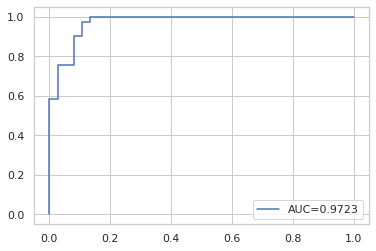

In [8]:
baseline_auc, baseline_acc = process_fold(create_mega_fold(baseline_runs), make_auc_plot=True)

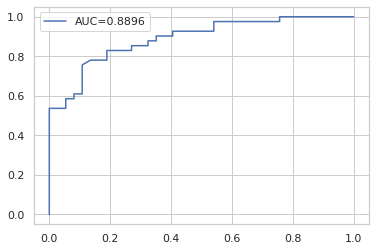

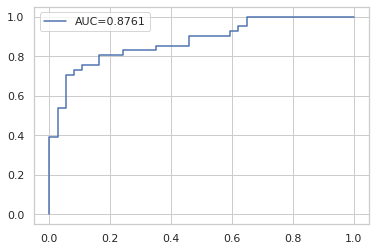

In [9]:
mask_32_auc, mask_32_acc = process_fold(create_mega_fold(center_mask_32_runs), make_auc_plot=True)
mask_96_auc, mask_96_acc = process_fold(create_mega_fold(center_mask_96_runs), make_auc_plot=True)

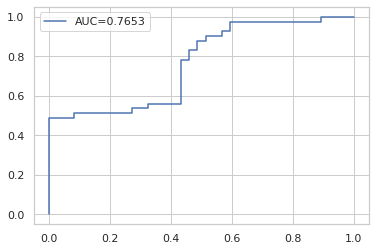

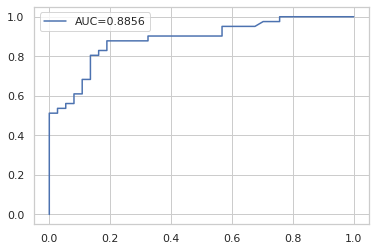

In [10]:
outer_128_auc, outer_128_acc = process_fold(create_mega_fold(outer_mask_128_runs), make_auc_plot=True)
outer_200_auc, outer_200_acc = process_fold(create_mega_fold(outer_mask_200_runs), make_auc_plot=True)

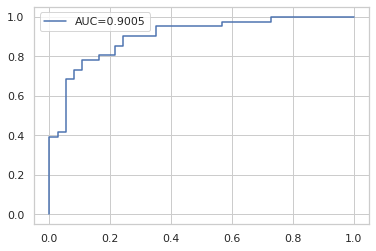

In [11]:
zoom_01_auc, zoom_01_acc = process_fold(create_mega_fold(zoom_01_runs), make_auc_plot=True)

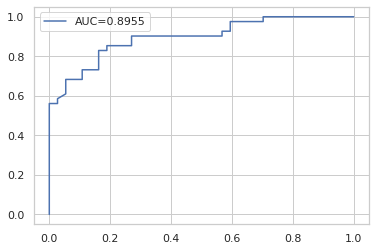

In [12]:
nucseg_auc, nucseg_acc = process_fold(create_mega_fold(nucseg_runs), make_auc_plot=True)

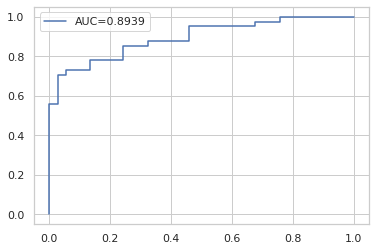

In [13]:
shear_1_auc, shear_1_acc = process_fold(create_mega_fold(shear_1_runs), make_auc_plot=True)

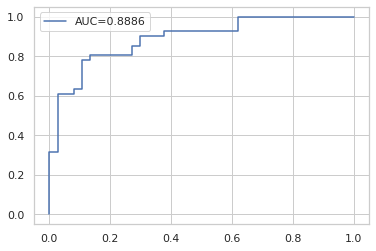

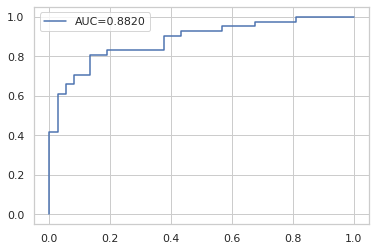

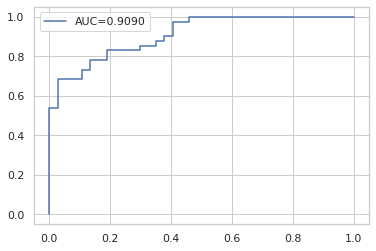

In [14]:
resize_32_auc, resize_32_acc = process_fold(create_mega_fold(resize_32_runs), make_auc_plot=True)
resize_64_auc, resize_64_acc = process_fold(create_mega_fold(resize_64_runs), make_auc_plot=True)
resize_128_auc, resize_128_acc = process_fold(create_mega_fold(resize_128_runs), make_auc_plot=True)

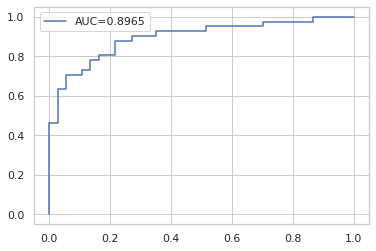

In [15]:
speckle_auc, speckle_acc = process_fold(create_mega_fold(speckle_runs), make_auc_plot=True)

In [16]:
import seaborn as sns
#sns.reset_defaults()
sns.set(style='whitegrid')
mpl.rcParams['figure.dpi'] = 300

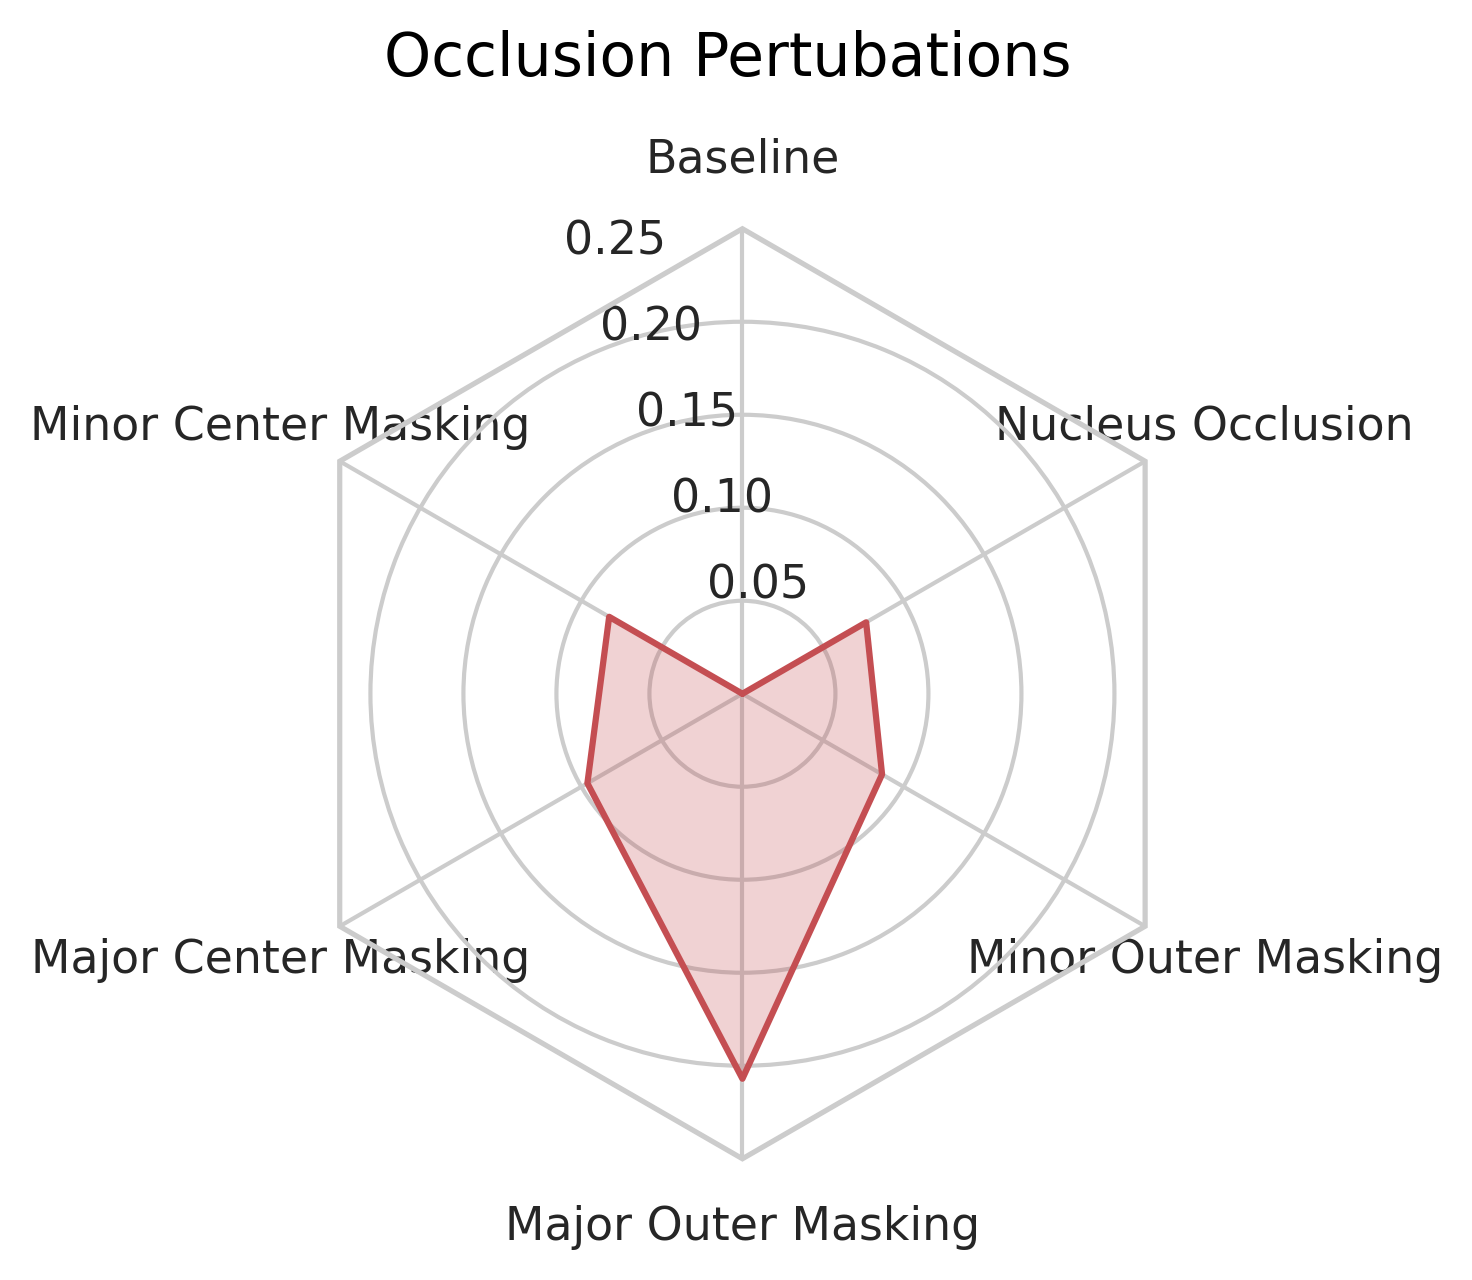

In [18]:
auc_vals = baseline_auc \
    - np.array([baseline_auc, mask_32_auc, mask_96_auc, outer_128_auc, outer_200_auc, nucseg_auc])
pert_names =   ['Baseline', 'Minor Center Masking', 'Major Center Masking', 'Major Outer Masking', 'Minor Outer Masking', 'Nucleus Occlusion']
N = len(pert_names)
theta = radar_factory(N, frame='polygon')

spoke_labels = pert_names

fig, axes = plt.subplots(figsize=(4, 4), nrows=1, ncols=1,
                            subplot_kw=dict(projection='radar'))

fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
color = 'r'
ax = axes
ax.set_rmax(0.21)
ax.set_autoscale_on(False)
ax.set_rgrids([0.05, 0.1, 0.15, 0.2, 0.25])
ax.plot(theta, auc_vals, color=color)
ax.fill(theta, auc_vals, facecolor=color, alpha=0.25)
ax.set_varlabels(spoke_labels)

fig.text(0.5, 0.965, 'Occlusion Pertubations',
            horizontalalignment='center', color='black',
            size='large')
plt.show()

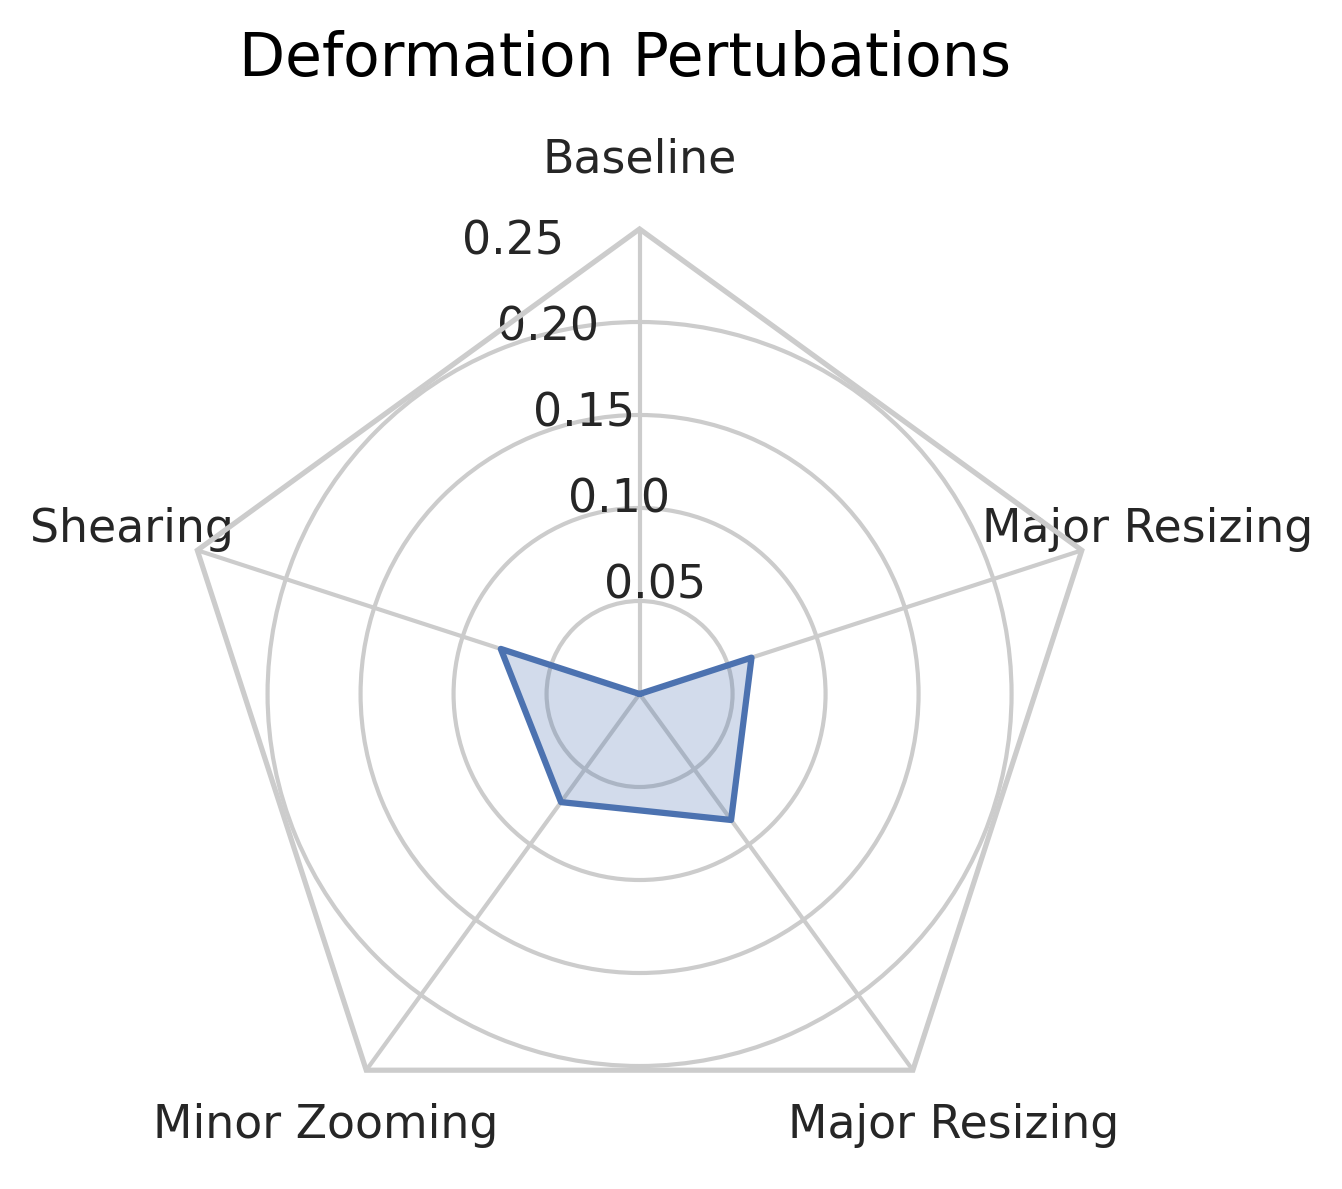

In [19]:
auc_vals = baseline_auc \
    - np.array([baseline_auc, shear_1_auc, zoom_01_auc, resize_32_auc, resize_128_auc])
pert_names =   ['Baseline', 'Shearing', 'Minor Zooming', 'Major Resizing', 'Major Resizing']
N = len(pert_names)
theta = radar_factory(N, frame='polygon')

spoke_labels = pert_names

fig, axes = plt.subplots(figsize=(4, 4), nrows=1, ncols=1,
                            subplot_kw=dict(projection='radar'))

fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
color = 'b'
ax = axes
ax.set_rmax(0.21)
ax.set_autoscale_on(False)
ax.set_rgrids([0.05, 0.1, 0.15, 0.2, 0.25])
ax.plot(theta, auc_vals, color=color)
ax.fill(theta, auc_vals, facecolor=color, alpha=0.25)
ax.set_varlabels(spoke_labels)

fig.text(0.5, 0.965, 'Deformation Pertubations',
            horizontalalignment='center', color='black',
            size='large')
plt.show()

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

